# LDA: LINEAR DISCRIMINANT ANALYSIS

**File:** LDA.ipynb


# IMPORT LIBRARIES

In [1]:
import pandas as pd              # For dataframes
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns            # For plotting data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # For LDA

# LOAD AND PREPARE DATA

Load the training data `trn` and testing data `tst` from the CSV files in the data directory.
Separate the data matrix from the class variable.

In [2]:
# Imports the training data
trn = pd.read_csv('data/optdigits_trn.csv')

# Separates the attributes P0-P63 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('data/optdigits_tst.csv')

# Separates the attributes P0-P63 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

In [3]:
# Shows the first few rows of the training data
trn.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,0,0,16,6,0,0,0,0,0,...,0,0,0,0,10,13,0,0,0,1
1,0,0,4,16,14,0,0,0,0,0,...,0,0,0,6,16,16,16,4,0,1
2,0,0,12,10,0,0,0,0,0,3,...,3,0,0,9,16,16,16,16,9,1
3,0,0,0,6,16,3,0,0,0,0,...,0,0,0,1,8,12,15,13,1,6
4,0,0,11,12,7,0,0,0,0,0,...,0,0,0,8,10,8,0,0,0,1


# LINEAR DISCRIMINANT ANALYSIS: TRAIN MODEL

In the training phase, we'll do the following:

1. Set up an LDA object as lda using `LinearDiscriminantAnalysis()`.
1. Fit the model to the training data `trn`.
1. Transform the data using `lda`.
1. Plot the transformed data.
1. Find the mean accuracy on the training data.

In [4]:
# Sets up the LinearDiscriminantAnalysis object
lda = LinearDiscriminantAnalysis()

# Fits the training data
lda.fit(X_trn, y_trn)

LinearDiscriminantAnalysis()

<AxesSubplot:>

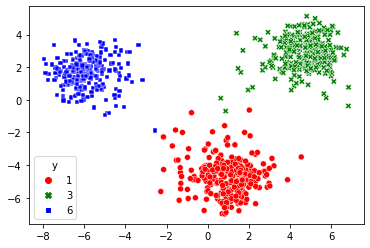

In [5]:
# Transforms training data
trn_tf = lda.transform(X_trn)

# Plots the projected data set on the first two discriminant functions and colors by class
sns.scatterplot(
    x=trn_tf[:, 0], 
    y=trn_tf[:, 1],
    style=y_trn,
    hue=y_trn,
    palette=['red', 'green', 'blue'])

Get the accuracy of the model on the training data using `score()` and display as percentage with two decimal places.

In [6]:
print('Accuracy on training data = ' 
    + str("{:.2%}".format(lda.score(X_trn, y_trn))))

Accuracy on training data = 99.63%


# TEST MODEL

In this phase, we'll take the LDA model developed above and do the following:

1. Transform the test set using the trained model.
1. Plots the transformed data.
2. Find the prediction accuracy on the testing data.


<AxesSubplot:>

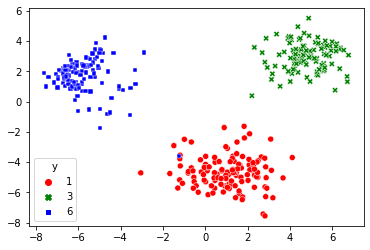

In [7]:
# Uses the trained model to transform the test data
tst_tf = lda.transform(X_tst)

# Plots the projected data set on the first two discriminant functions and colors by class
sns.scatterplot(
    x=tst_tf[:, 0], 
    y=tst_tf[:, 1],
    style=y_tst,
    hue=y_tst,
    palette=['red', 'green', 'blue'])

Get the accuracy of the model on the testing data using `score()` and display as percentage with two decimal places.

In [8]:
print('Accuracy on testing data = ' 
    + str("{:.2%}".format(lda.score(X_tst, y_tst))))

Accuracy on testing data = 99.71%


# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.